In [1]:
# required libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# load data to dataFrame
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv',index_col='Unnamed: 0' )

In [3]:
#read the first rows of data
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
# show shape of dataSet
df.shape

(23486, 10)

In [5]:
#Show more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
# show count of nulls in each row
(df.isnull().sum()/len(df))*100 

Clothing ID                 0.000000
Age                         0.000000
Title                      16.222430
Review Text                 3.597888
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.059610
Department Name             0.059610
Class Name                  0.059610
dtype: float64

In [7]:
df.duplicated().sum()

21

In [ ]:
def rename_columns(df):
    for column in df.columns:
        df

In [ ]:
#show name of columns
df.columns

In [8]:
df.columns =['Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating',
       'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name',
       'Department_Name', 'Class_Name']

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

### Clean data

In [9]:
df.dropna(subset=['Division Name', 'Department Name', 'Class Name'],  axis= 0,inplace =True)

In [10]:
(df.isnull().sum()/len(df))*100 

Clothing ID                 0.000000
Age                         0.000000
Title                      16.227846
Review Text                 3.595774
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.000000
Department Name             0.000000
Class Name                  0.000000
dtype: float64

In [11]:
df.shape

(23472, 10)

In [12]:
df.drop('Title',axis=1, inplace=True)

In [13]:
# chech column names 
df.columns

Index(['Clothing ID', 'Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [14]:
# Convert review text to string
df['Review Text'] = df['Review Text'].astype(str)

<center> <h1>Task 1</h1></center>

In [15]:

def convert_Categorical(df, max_category = 30):
    for col in df.columns:
        num_category = df[col].nunique()
        if num_category < max_category:
            df[col] = df[col].astype('category')

In [16]:
convert_Categorical(df)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23472 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Clothing ID              23472 non-null  int64   
 1   Age                      23472 non-null  int64   
 2   Review Text              23472 non-null  object  
 3   Rating                   23472 non-null  category
 4   Recommended IND          23472 non-null  category
 5   Positive Feedback Count  23472 non-null  int64   
 6   Division Name            23472 non-null  category
 7   Department Name          23472 non-null  category
 8   Class Name               23472 non-null  category
dtypes: category(5), int64(3), object(1)
memory usage: 1.0+ MB


# EDA

### What is the average age of the customers?

In [18]:
# explore the distribution of Age customer 
df.Age.describe()

count    23472.000000
mean        43.200707
std         12.280913
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

Text(0, 0.5, 'Count Of Age')

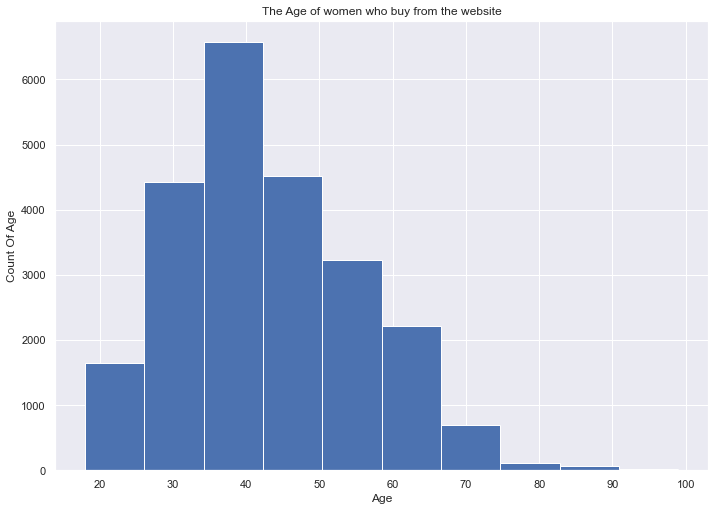

In [19]:
# visualize the distribution of Age
df.hist('Age')
plt.title('The Age of women who buy from the website')
plt.xlabel('Age')
plt.ylabel('Count Of Age');

### What is the most age group that goes to buy clothes?

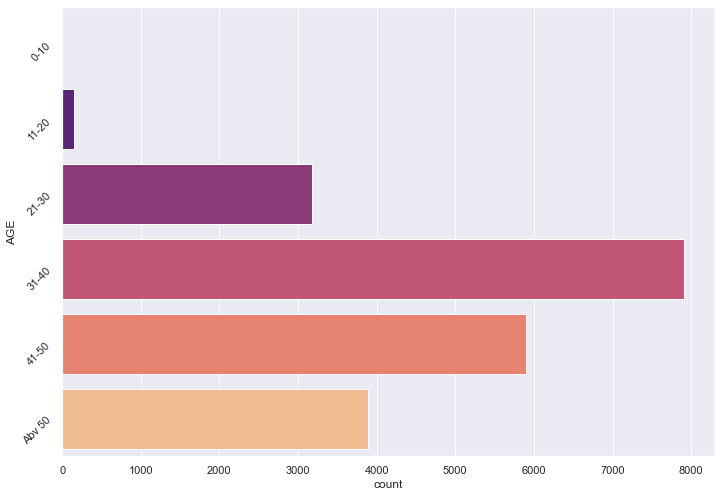

In [20]:
df['AGE'] = pd.cut(df['Age'], [0,10,20,30,40,50,60], labels=['0-10','11-20','21-30','31-40','41-50','Abv 50'])
sns.countplot(y ='AGE', data = df,palette = 'magma')
plt.yticks(rotation = 45);

<center> <h3>Task 1.1</h3></center>

In [21]:
df.Rating.describe()

count     23472
unique        5
top           5
freq      13117
Name: Rating, dtype: int64

## What is the general rating for Women's E-Commerce Clothing ?

Text(0.5, 1.0, 'Rating distribution')

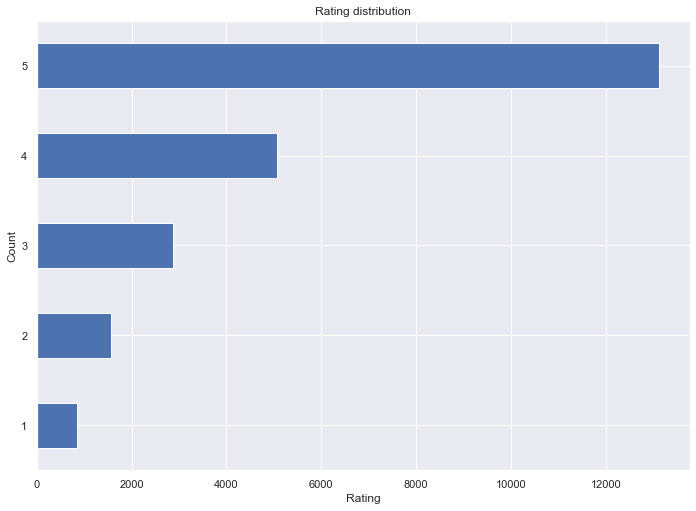

In [22]:
# visualize the general rating
df.Rating.value_counts(ascending = True).plot(kind ='barh')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating distribution')

In [23]:
Percentage_Rating = (len(df[df['Rating'] ==5 ]) / len(df['Rating']))*100
Percentage_Rating

55.883605998636675

<center> <h3>Task 1.2</h3></center>

In [24]:
df['Positive Feedback Count']= df['Positive Feedback Count'].astype('category')

In [25]:
df['Positive Feedback Count'].describe()

count     23472
unique       82
top           0
freq      11165
Name: Positive Feedback Count, dtype: int64

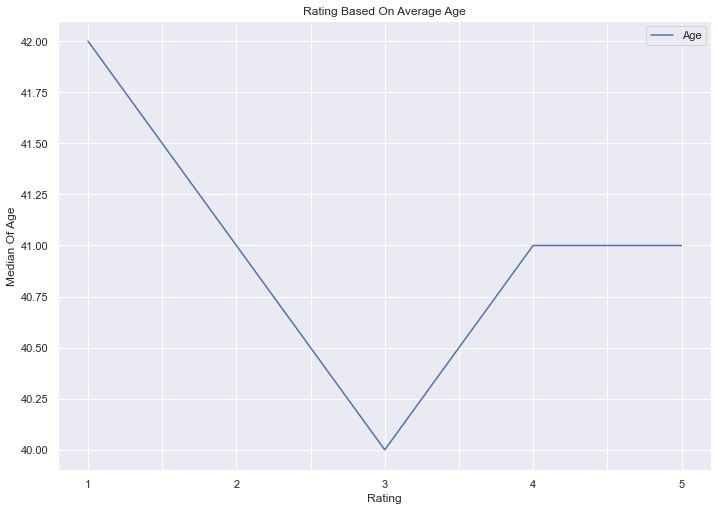

In [26]:
#Rating based on Age
pd.DataFrame(df.groupby('Rating')['Age'].median()).plot()
plt.ylabel('Median Of Age')
plt.xlabel('Rating')
plt.title("Rating Based On Average Age");

<center> <h1>Task 2</h1></center> 

### What is the Rating for each Department Name?

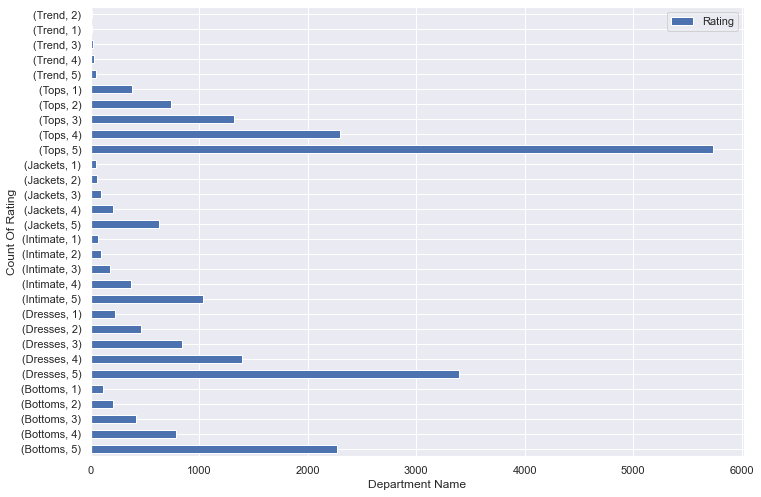

In [27]:
#Rating based on Department Name
pd.DataFrame(df.groupby('Department Name')['Rating'].value_counts()).plot(kind ='barh')
plt.ylabel('Count Of Rating')
plt.xlabel('Department Name')
plt.title("")
plt.show()

In [28]:
### anther soluthion

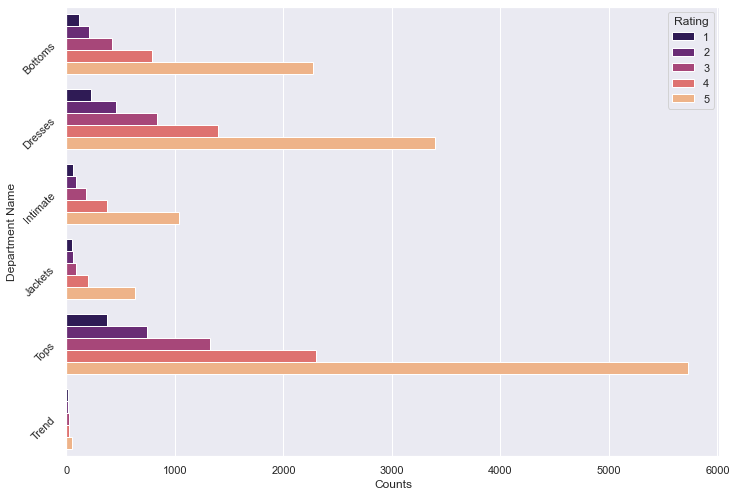

In [29]:
y = pd.DataFrame(df.groupby('Department Name')['Rating'].value_counts()).reset_index()
y.columns = ['Department Name','Rating','Counts']
sns.barplot(y="Department Name", x="Counts", data=y, hue = "Rating" , color="red",palette = 'magma',ci = None)
plt.yticks(rotation = 45)
plt.show()

In [30]:
df['Division Name'].describe()

count       23472
unique          3
top       General
freq        13850
Name: Division Name, dtype: object

------------------------------------------------

<center> <h2>Self learning</h2></center>

******************************************************

## What is the Rating for each Division Name?

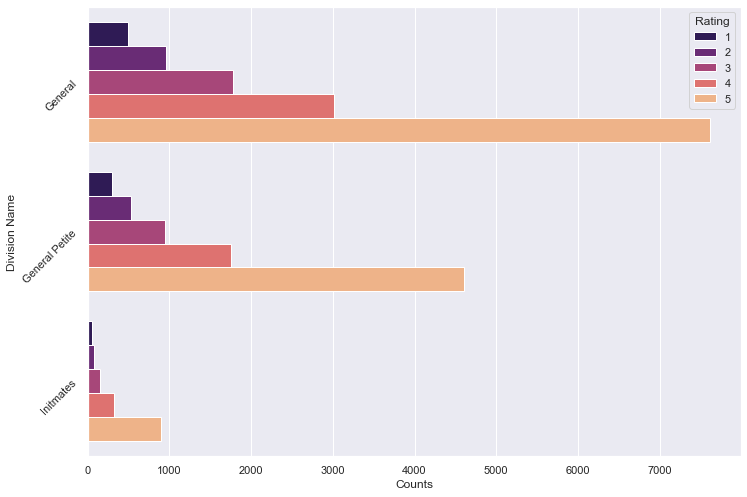

In [31]:
y = pd.DataFrame(df.groupby('Division Name')['Rating'].value_counts()).reset_index()
y.columns = ['Division Name','Rating','Counts']
sns.barplot(y="Division Name", x="Counts", data=y, hue = "Rating" ,palette = 'magma',ci = None)
plt.yticks(rotation = 45)
plt.show()

## What are the best Divisions for each age group?

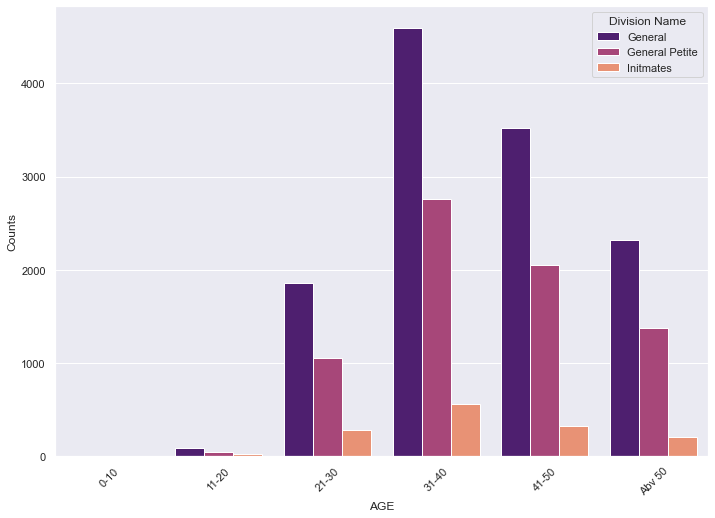

In [32]:
y = df.groupby(['AGE','Division Name'])['AGE'].count().to_frame()
y.index.rename(['AGE_1','Division Name'],inplace = True)
y = y.reset_index()
y.columns = ['AGE','Division Name','Counts']
sns.barplot(x="AGE", y="Counts", data=y, hue = "Division Name" ,palette = 'magma',ci = None)
plt.xticks(rotation = 45)
plt.show()

In [33]:
df['Class Name'].describe()

count       23472
unique         20
top       Dresses
freq         6319
Name: Class Name, dtype: object

## What is the Rating for each class Name?

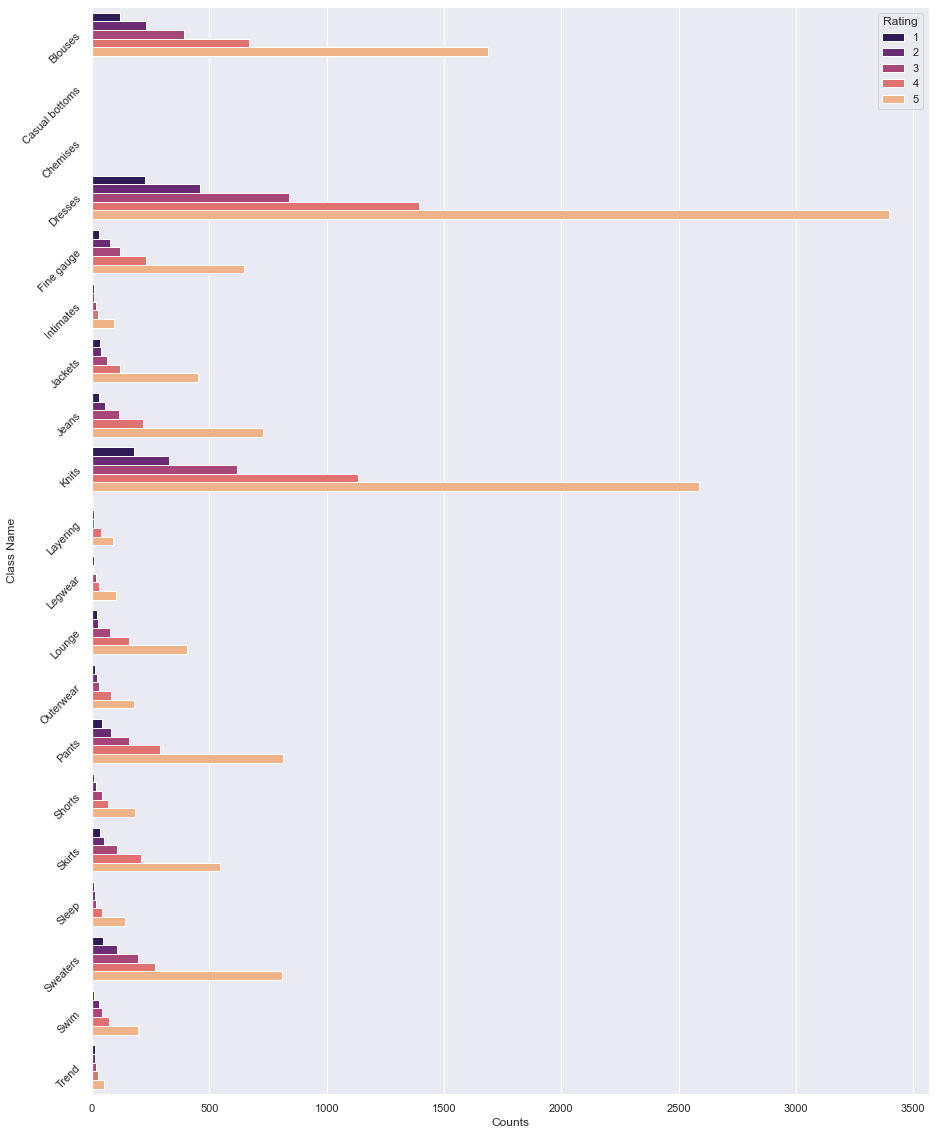

In [34]:
y = pd.DataFrame(df.groupby('Class Name')['Rating'].value_counts()).reset_index()
y.columns = ['Class Name','Rating','Counts']
fig, ax = plt.subplots(figsize=(15, 20))
sns.barplot(y="Class Name", x="Counts", data=y, hue = "Rating" ,palette = 'magma',ci = None,ax=ax)
plt.yticks(rotation = 45)
plt.show()

## What are the best Class for each age group?

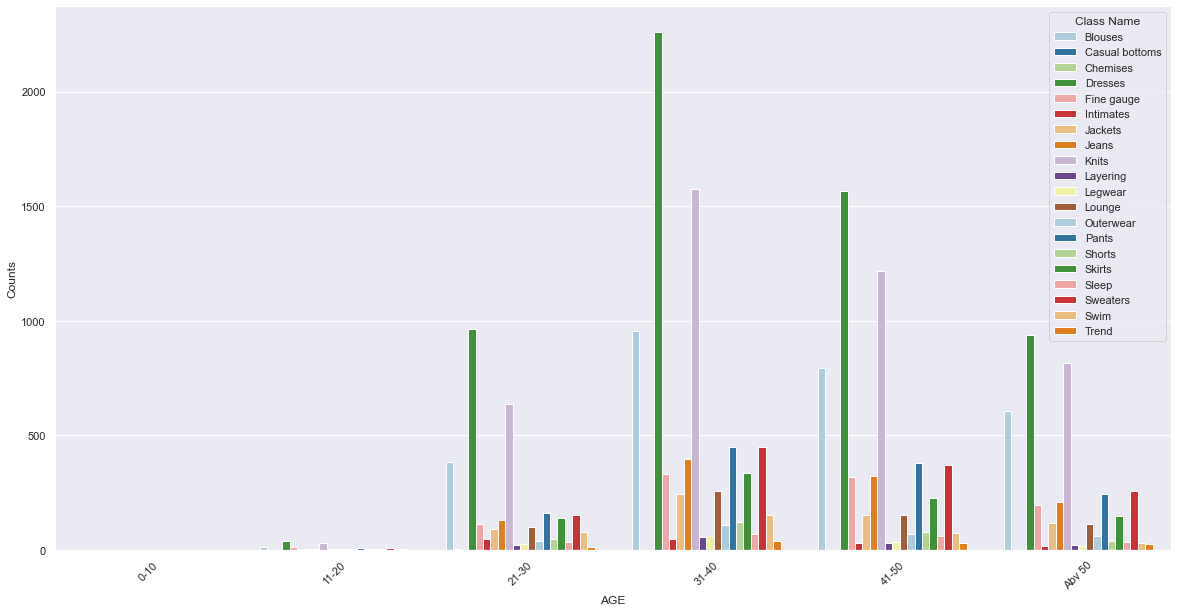

In [35]:
y = df.groupby(['AGE','Class Name'])['AGE'].count().to_frame()
y.index.rename(['AGE_1','Class Name'],inplace = True)
y = y.reset_index()
y.columns = ['AGE','Class Name','Counts']
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x="AGE", y="Counts", data=y, hue = 'Class Name' ,palette = 'Paired',ci = None,ax =ax)

plt.xticks(rotation = 45)
plt.show()

###  Recommmend item for each  Division , Class and Department  

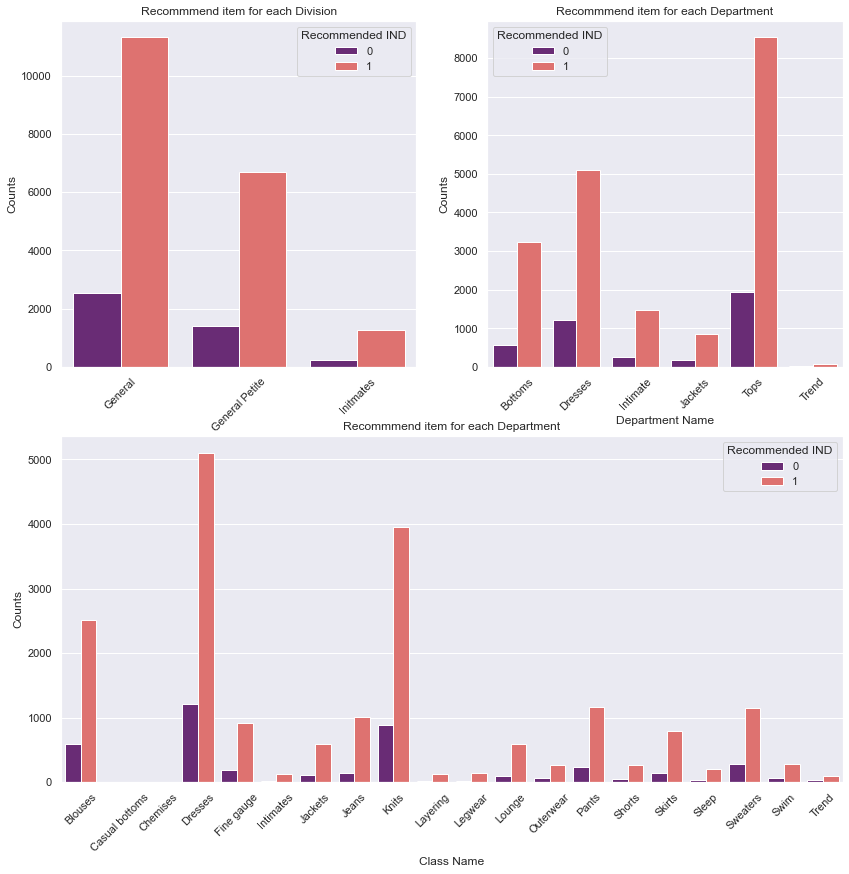

In [36]:
y = pd.DataFrame(df.groupby('Division Name')['Recommended IND'].value_counts()).reset_index()
y.columns = ['Division Name','Recommended IND','Counts']
fig = plt.figure(figsize=(14, 14))
ax1 = plt.subplot2grid((2, 2), (0, 0))
sns.barplot(x="Division Name", y="Counts", data=y, hue = "Recommended IND" ,palette = 'magma',ci = None,ax=ax1)
plt.title('Recommmend item for each Division')
plt.xticks(rotation = 45)


y = pd.DataFrame(df.groupby('Department Name')['Recommended IND'].value_counts()).reset_index()
y.columns = ['Department Name','Recommended IND','Counts']
ax2 = plt.subplot2grid((2, 2), (0, 1))
sns.barplot(x="Department Name", y="Counts", data=y, hue = "Recommended IND" ,palette = 'magma',ci = None,ax=ax2)
plt.title('Recommmend item for each Department')
plt.xticks(rotation = 45)


y = pd.DataFrame(df.groupby('Class Name')['Recommended IND'].value_counts()).reset_index()
y.columns = ['Class Name','Recommended IND','Counts']
ax3 = plt.subplot2grid((2, 2), (1, 0),colspan=2)
sns.barplot(x="Class Name", y="Counts", data=y, hue = "Recommended IND" ,palette = 'magma',ci = None,ax=ax3)
plt.title('Recommmend item for each Department')
plt.xticks(rotation = 45)
plt.show()